##**Obtenção das bases de imagens:**
*Baixar as imagens de teste diretamente do github*

*Obs.: Desta forma as imagens ficarão disponíveis somente enquanto esta sessão permanecer ativa ou até que o usuário  clique em no menu: Runtime>Factory reset runtime*

In [ ]:
!git clone https://github.com/guimota-uerj/TestImages.git
!pwd
!ls

Cloning into 'TestImages'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 104 (delta 22), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (104/104), 19.32 MiB | 13.46 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content/TestImages/StormTrooper
StormTrooper.jpg  TestImages


*Entrar na pasta da imagem de teste utilizada*

In [ ]:
%cd /content/TestImages/StormTrooper/
!ls

/content/TestImages/StormTrooper
StormTrooper.jpg  TestImages


# **Questão 1):**

\

A imagem StormTrooper.jpg foi distorcida por uma transformação projetiva.

\

**a.** Obtenha a matriz de transformação que recupera a geometria original usando a função cv2.getPerspectiveTransform().

**b.** Calcule a mesma matriz pelo método dos mínimos quadrados, usando operações com matrizes.

**c.** Compare e analise os resultados obtidos nos itens **a.** e **b.**.

\

**Atenção:** no item **b.** somente é permitido usar funções prontas que invertam, transponham e multipliquem matrizes.

\

**Dica:** utilize os vértices da folha de papel, que tem formato A4, como referência.

\



In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

pts1 = np.float32([[526,110],[1410,228],[32,1074],[1248,1310]])
#estimativa do papel A4
dist1= 1500
dist2= 1800
pts2 = np.float32([[0, 0], [dist1 - 1, 0], [0, dist2 - 1],[dist1- 1,dist2 - 1]])


#QUESTÃO (A)
M = cv2.getPerspectiveTransform(pts1,pts2)

#QUESTÃO (B)
# PROFESSOR: Tive bastante dificuldades de escrever a matemática do mmq em código (como havia comentado com você), por isso pedi ajuda de uma das minhas colegas com quem estava em contato.
# Estou informando isso pois o código abaixo foi feito com a instrução da aluna Lilian e portanto você deve obsevar algo bem parecido no trabalho dela.

def mmq(p1,p):
  n = (int) (p1.size)
  A = np.zeros((n,n))
  i = 0
  j = 0
  while(i < n):
    A[i][0] = p[j][0]
    A[i][1] = p[j][1]
    A[i][2] = 1
    A[i][6] = -p[j][0]*p1[j][0]
    A[i][7] = -p[j][1]*p1[j][0]
    A[i+1][3] = p[j][0]
    A[i+1][4] = p[j][1]
    A[i+1][5] = 1
    A[i+1][6] = -p[j][0]*p1[j][1]
    A[i+1][7] = -p[j][1]*p1[j][1]
    i=i+2
    j=j+1

  A1 = A.T.dot(A)
  A2 = np.linalg.inv(A1)
  L = np.dot(A.T,np.reshape(p1,8))
  A = A2.dot(L)
  A = np.insert(A,8,1)
  T = np.reshape(A,(3,3))

  return T

T = mmq(pts2,pts1)
Dif=M-T

print('T:')
print(T)
print('M:')
print(M)
print('Diferença entre matrizes:')
print(Dif)

#QUESTÃO (C)
# Será descrita em texto a seguir

T:
[[ 1.74800951e+00  8.95764211e-01 -1.01798707e+03]
 [-3.39228980e-01  2.54134253e+00 -1.01113235e+02]
 [ 3.40812162e-06  4.23490557e-04  1.00000000e+00]]
M:
[[ 1.74800951e+00  8.95764211e-01 -1.01798707e+03]
 [-3.39228980e-01  2.54134253e+00 -1.01113235e+02]
 [ 3.40812162e-06  4.23490557e-04  1.00000000e+00]]
Diferença entre matrizes:
[[-1.01918474e-13 -1.28785871e-14  1.14141585e-10]
 [ 6.82787160e-15  8.43769499e-15  4.00746103e-12]
 [-4.02425353e-18 -7.10152423e-18  0.00000000e+00]]


# **Questão 1: Letra (C)**
Operações geométricas, na visão computacional, estabelecem uma relação, pixel à pixel, das coordenadas dos pixels da imagem de saída em relação à imagem de entrada, ou seja, o pixel $x_1y_1$, por exemplo, na imagem de entrada será o pixel $x_ny_n$ da imagem de saída, assim modificando a geometria da imagem de saída. Essas operações se precisam de dois modelos matemáticos: a transformação geométrica e a reconstrução $f'(x,y)$.

Na questão 1 estamos calculando a matriz transformação, utilizando a função ***cv2.getPerspectiveTransform()*** do OpenCV no item A e obtendo essa mesma matriz pelo calculo do **MMQ** (Método dos Mínimos Quadrados) no item B.

No trabalho estamos "corrigindo" a perspectiva da imagem de entrada, ou seja, estamos lidando com duas imagens bidimensionais, porém tratando de uma transformação de coordenadas. Assim,
\begin{equation}
Tr(T(x,y))=(u,v)
\end{equation}
de forma que:

$(x,y)$ são as coordenadas da imagem de entrada;

$(u,v)$ são as coordenadas da imagem de saída;

$T$ é a transformação entre coordenadas da imagem contínua de entrada e as coordenadas da imagem intermediária necessária para essa operação geométrica;

$Tr$ é a translação, responsável por gerar de fato a coordenadas respectivas da imagem de saída.

Porém, para essa reconstrução ocorrer acontece uma "varredura" da imagem de saída, buscando para cada píxel dessa imagem a tonalidade no pixel respectivo na imagem de entrada, e logo deve ser realizado o processo inverso:

$$Tr⁻¹(T⁻¹(x,y))=(u,v)$$

*Observação:* Como a posição do píxel na imagem de entrada não é discreta exata, ocorre uma interpolação na imagem de entrada, logo a reconstrução não é exata, mas uma aproximação da imagem original. Diferentes formas de reconstrução geraram diferentes erros na imagem de saída, como será discutido na próxima questão.

Uma transformação de coordenadas tem a seguinte forma:

$$\begin{vmatrix}
u \\
v  \\
s
\end{vmatrix} =
\begin{vmatrix}
a& b& c \\
d&e&f  \\
g&h&i
\end{vmatrix}
\begin{vmatrix}
x \\
y  \\
w
\end{vmatrix}
$$

$$ p' = M . p$$

onde a primeira matriz condiz com o pixel da imagem intermediária (p'), a matriz 3x3 é a matriz de transformação (M) e a matriz pela qual ela é multiplicada representa o pixel da imagem original (p).

É importante lembrar, para que isso seja possível a matriz com as coordenadas do pixel tratado devem estar normalizaddas, caso não estejam o resultado será não normalizado, o que significa que precisará ocorrer uma normalização do ponto obtido.

$$ P= \begin{vmatrix}
x \\
y  \\
1
\end{vmatrix}
$$

onde,
$P$ são as coordenadas do pixel da imagem de origem normalizadas.

O MMQ permite que seja obtido uma função linear (ou até não linear) que minimize o erro quadrático, ele tem em sua forma básica a aparência $AX=L$, sendo $A$ matriz de coeficientes dos parâmetros, $X$ são os parâmetros verdadeiros do modelo e $L$ o vetor de observações.
Pensando na equação de transformação de coordenadas em matrizes e o MMQ, temos que $p'$ equivale à $L$, $M$ equivale à $A$ e $p$ equivale à $X$. Porém,como os coeficientes dos parâmetros não formam uma matriz quadrada, por Gauss, chegamos à

$$X'=(A^TA)^{-1}A^TL$$

onde

$X'$ é a estimativa de $X$;

$A^T$ é a transposta de $A$.

Realizando o MMQ com a solução de Gauss, e aplicando os pontos informados inicialmente no trabalho chegamos a matriz de coeficientes de parâmetros com o menor índice de erro quadrático possível usado para a reconstrução da imagem de saída.

Logo, se nos basearmos na teoria previamente explicada e sabendo que a função cv2.getPerspectiveTransform() nos dá a matriz de transformação necessária para a reconstrução da imagem, ambos os resultados dos itens A e B devem ter valores muito próximos, que é exatamente o que ocorre neste exercício onde a diferença não é visível nas próprias matrizes resultado, indicando que se caso ocorra, é presente de forma irrisória como apresentado em uma última matriz que nada mais é do que a diferença entre esses valores de parâmetros obtidos.





# **Questão 2:**

Aplique a matriz de transformação obtida na questão 1 e corrija a prespectiva da imagem utilizando as interpolações:

\

**a.**  vizinho mais próximo

**b.**  bilinear

**c.**  bicúbica

\

**Atenção:** Explique os resultados com base na teoria apresentada nas aulas.

\

**Dica:** para mostrar o efeito da intepolação, apresente um pequeno fragmento das imagens de saída lado a lado.



(1448, 1456, 3)
(50, 50, 3)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f023b80c780>,
 (0.0, 1.0, 0.0, 1.0),
 Text(0.5, 1.0, 'BICUBIC'))

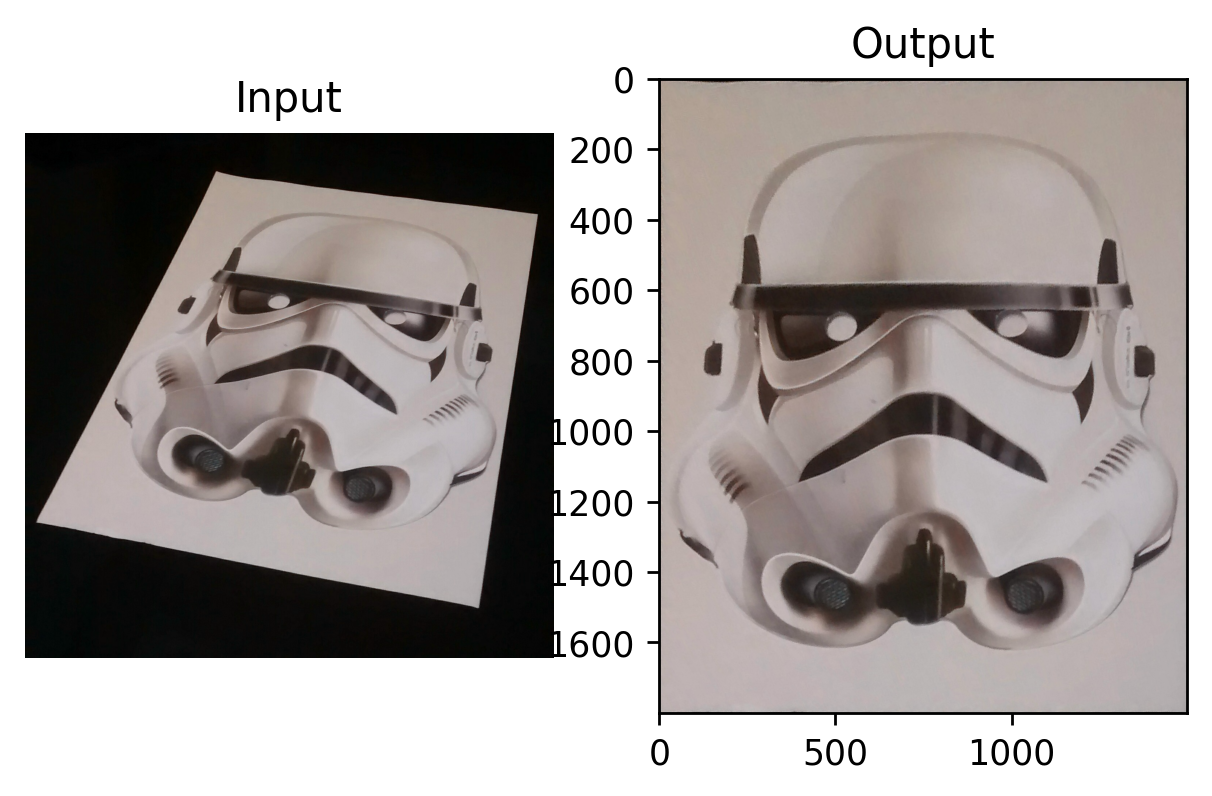

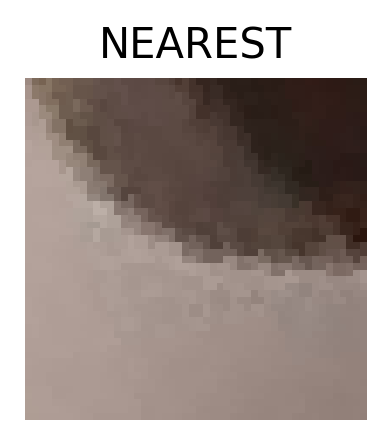

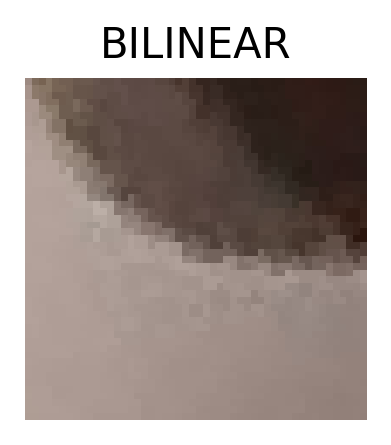

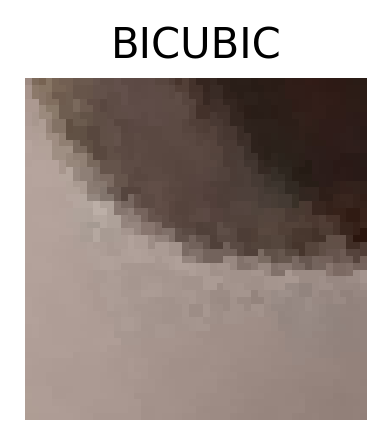

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_in = cv2.imread('StormTrooper.jpg')

print(img_in.shape)

M = np.float32([[ 1.74800951e+00 , 8.95764211e-01, -1.01798707e+03],
 [-3.39228980e-01 , 2.54134253e+00 ,-1.01113235e+02],
 [ 3.40812162e-06 , 4.23490557e-04 , 1.00000000e+00]])

img_out = cv2.warpPerspective(img_in,M,(1500,1800),flags=cv2.INTER_NEAREST)

plt.figure(dpi=250)
plt.subplot (121), plt.axis('off'), plt.imshow(img_in),plt.title('Input')
plt.subplot (122), plt.axis('on'), plt.imshow(img_out),plt.title('Output') # coloquei o axis pra poder achar um ponto na minha imagem output.


img_crop = img_out[775:825,325:375,:]
print(img_crop.shape)

plt.figure(dpi=250)
plt.subplot (132), plt.axis('off'), plt.imshow(img_crop), plt.title('NEAREST')

img_out = cv2.warpPerspective(img_in,M,(1500,1800),flags=cv2.INTER_LINEAR )
plt.figure(dpi=250)
plt.subplot (132), plt.axis('off'), plt.imshow(img_crop), plt.title('BILINEAR')

img_out = cv2.warpPerspective(img_in,M,(1500,1800),flags=cv2.INTER_CUBIC )
plt.figure(dpi=250)
plt.subplot (132), plt.axis('off'), plt.imshow(img_crop), plt.title('BICUBIC')


# **Questão 2**

Como comentado na questão anterior, reconstruções diferentes geram erros diferentes, ou seja, resultados qualitativamente distintos. Isso se deve pela uso de sensores discretos diferentes na imagem original.
Neste exercício realizamos três tipos de reconstrução: por vizinhos mais próximos, bilinear e  bicubica.
Considerando que as três funções tem mesma finalidade, a reconstrução da imagem inteira é visualizada somente pelo método de vizinhos mais próximos, pois assim pode ser avaliado visualmente o que foi discutido em parte na questão 1. É facilmente identificado o efeito de correção de perspectiva que temos como objetivo, pois na imagem original a máscara do stormtrooper, que está sobre uma folha A4, é observada de um ângulo cônico não centralizado com a figura, já a imagem de saída apresenta uma visão "de cima" da máscara, mudando completamente a perspectiva da imagem de saída. Desconsiderando o fundo preto da imagem de entrada temos uma clara mudaça na geometria da imagem original para a imagem resconstruída.

Para avaliarmos a distinções entre os métodos de reconstrução, são mostrados recortes de 50x50 da mesma área da imagem de saída de cada método. A reconstrução pode ser descrita da seguinte forma:

$$f'(x,y)=\sum_{\substack{\forall(x_i,y_i)\in \mathbb{U}}} f(x_i,y_i)\Phi(x-x_i,y-y_i)$$

onde,

$f'(x,y)$ é a função da imagem reconstruída;

$f(x_i,y_i)$ é a função da imagem discreta original;

$\Phi(x-x_i,y-y_i)$ interpolação da função de reconstrução ($\Phi$ é o filtro aplicado);

$\sum_{\substack{\forall(x_i,y_i)\in \mathbb{U}}}$ indica que esse processo vai ser realizado em cada pixel do filtro em volta do pixel central.

Assim, é fácil perceber que o fator decisivo na aparência final dessa fórmula é o filtro ($\Phi$). Quanto maior for o filtro usado nessa mais pixels a função estará considerando. Isso significa que reconstruções com filtros de dimenções maiores geram imagens mais suaves, porém de processos mais custosos computacionalmente e logo, mais lentos. O método dos vizinhoos mais próximos leva em consideração somente os pixels da primeira camada mais próxima do pixel central, enquanto o bilinear considera as duas camadas próximas e o bicúbico trabalha com o envoltório de 16 pixels. Na imagem gerada neste exercício a diferença entre os métodos de vizinhos mais próximos e bilinear é praticamente imperceptível, enquanto na bicubica, apesar de ser difícil de visualizar, tem como efeito a suavização das curvas no recorte apresentado.

